In [1]:
import rasterio as rio
import matplotlib.pyplot as plt 
from matplotlib.colors import Normalize
import numpy as np
import numpy.matlib
from scipy import interpolate
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
import scipy
import os, sys, pickle, gzip
import datetime
import geopy.distance
import xarray as xr
import pandas as pd
import geopandas as gpd
import shapely.geometry
import shapely.ops
import cartopy
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import itertools
import random
import metpy
from metpy.plots import USCOUNTIES
from pyts.decomposition import SingularSpectrumAnalysis

import warnings
warnings.filterwarnings('ignore')

In [2]:
run ../util/setupConsole

In [3]:
dataDirDiscovery = '/dartfs-hpc/rc/lab/C/CMIG/ecoffel/data/projects/ag6'

In [8]:
maize_clm_crop_firr_yield = xr.open_dataset('%s/agmip/CLM-Crop.Maize/agmerra/clm-crop_agmerra_hist_default_firr_yield_mai_annual_1980_2010.nc4'%dataDirDiscovery, decode_times=False)
maize_clm_crop_noirr_yield = xr.open_dataset('%s/agmip/CLM-Crop.Maize/agmerra/clm-crop_agmerra_hist_default_noirr_yield_mai_annual_1980_2010.nc4'%dataDirDiscovery, decode_times=False)

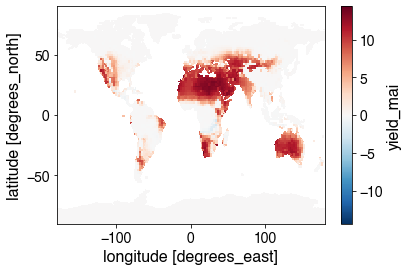

In [18]:
diff = maize_clm_crop_firr_yield.yield_mai.mean(dim='time') - maize_clm_crop_noirr_yield.yield_mai.mean(dim='time')
diff.plot()